# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

# Fluxonium Design version 3.3: with this version Ec is 1.00GHz.
# And LP's are 200nm.

## Design&LOM&GDS

### Preparations

In [4]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround

from qiskit_metal.analyses.quantization import LOManalysis

from qiskit_metal.qlibrary.terminations.ebeam_marker import Markers
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [6]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =0, pos_x = '0mm', pos_y = '0mm',
                     
    flux_bias_line_options=Dict(make_fbl = True,), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
           ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,  
           ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [7]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '0mm',                        
  'pos_y'             : '0mm',                        
  'orientation'       : 0,                            
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '100um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'l_length'          : '100um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'L_j'               : '34.38nH',                    
  'pocket_width'      : '900um',                      
  'pocket_hei

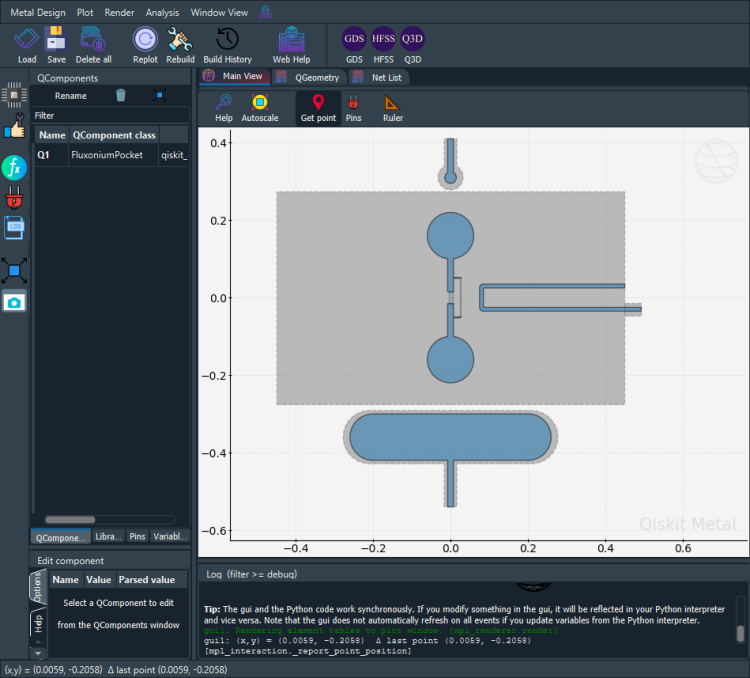

In [8]:
#Save screenshot as a .png formatted file.
gui.screenshot()

# LOM Fluxonium Qubits

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [9]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

c1 = LOManalysis(design, "q3d")

In [10]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [11]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [12]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 04:53PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:53PM [load_ansys_project]: 	Opened Ansys App
INFO 04:53PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 04:53PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 04:53PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:53PM [connect]: 	Connected to project "Project47" and design "Design_q3d" 😀 

INFO 04:53PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:53PM [analyze]: Analyzing setup Setup
INFO 04:57PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmppu2bpogs.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.19923,-0.11989,-21.17034,-0.06692,-0.60026,-0.04566
flux_bias_line_Q1,-0.11989,59.08950,-45.17104,-4.77940,-4.80854,-2.19679
ground_main_plane,-21.17034,-45.17104,348.82790,-21.81649,-25.63199,-166.44309
pad_bot_Q1,-0.06692,-4.77940,-21.81649,37.05540,-3.51953,-5.45344
pad_top_Q1,-0.60026,-4.80854,-25.63199,-3.51953,37.02446,-1.05646
readout_padNline_Q1,-0.04566,-2.19679,-166.44309,-5.45344,-1.05646,177.57819


In [13]:
# capacitance with pocket-height=650um

Cpad_top = 25.61395
Cpad_bot = 21.79921
Creadout_bot = 5.45500
Creadout_top = 1.05780
Ccharge_top = 0.60025
Cfluxpad_top = 4.80577
Cfluxpad_bot = 4.77768

C_pads = 3.51689

C_top = Cpad_top + Ccharge_top + Cfluxpad_top + Creadout_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Ctop:', C_top, 'fF')
print('Cbot:', C_bot, 'fF')
print('Total Capacitance:', Csigma, 'fF')

Ctop: 32.077769999999994 fF
Cbot: 32.031890000000004 fF
Total Capacitance: 19.54429679150849 fF


In [15]:
import numpy as np
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 991.0936879100383 MHz


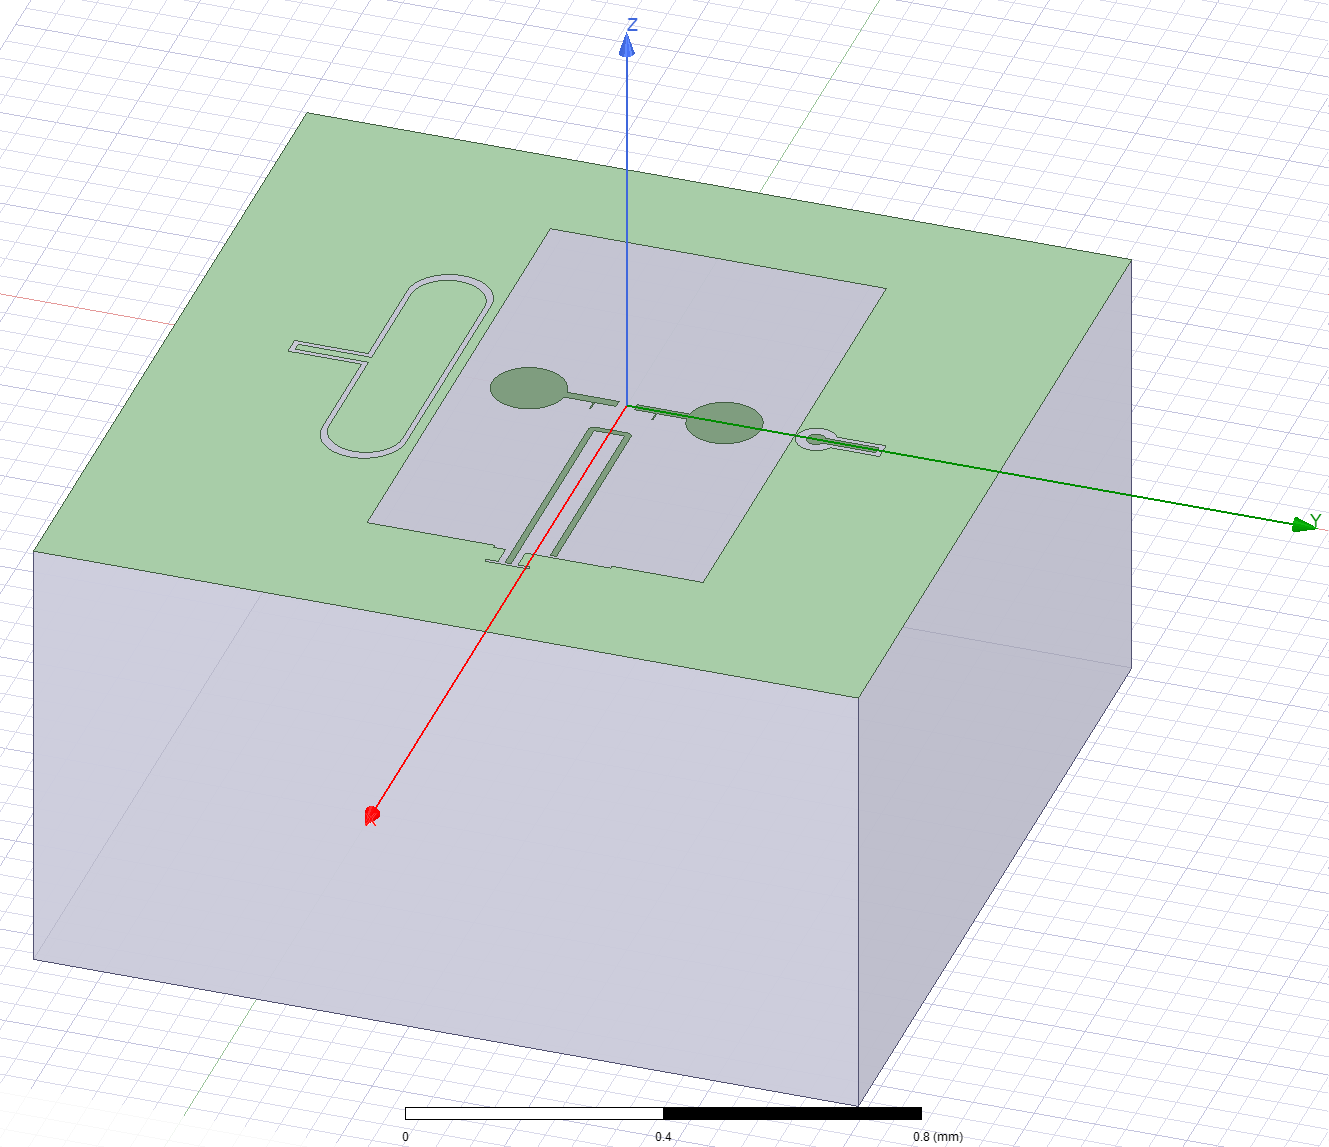

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [12]:
c1.sim.save_screenshot()

In [32]:
gui.main_window.close()

True